**This is Notebook number 3. Notebook 1 w

In [1072]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


# Preprocess

In [817]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import os

# import k-means from clustering stage
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt


#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

## Import data

### Venue Data

In [818]:
# Zip code venue data part 1
url = 'https://raw.githubusercontent.com/vjacobsen/Coursera_Capstone/master/Support%20Outputs/Dataset_zips_1.csv'
zips_1 = pd.read_csv(url, error_bad_lines=False)

# Zip code venue data part 2
url = 'https://raw.githubusercontent.com/vjacobsen/Coursera_Capstone/master/Support%20Outputs/Dataset_zips_2.csv'
zips_2 = pd.read_csv(url, error_bad_lines=False)

# Append zip 1 and zip 2 dataframes
cities_zips = zips_1.append(zips_2)
cities_zips = cities_zips.rename(columns={'zip_latitute':'zip_latitude'})

# Convert Zip to string
cities_zips['zip_code'] = cities_zips['zip_code'].astype(str)

# Format Zip code
# pad to 5 chars 
cities_zips['zip_code'] = [string.replace('.0','') for string in cities_zips['zip_code'].astype(str)]
cities_zips['zip_code'] = cities_zips['zip_code'].str.pad(5,side='left',fillchar='0')

print(cities_zips.shape)
cities_zips.sample(5)

(298390, 8)


zip_code  zip_latitude  zip_longitude                         venue  \
124129    77844     30.652120     -96.341012                    Gold's Gym   
106285    94701     37.860576    -122.296730           Spoon Korean Bistro   
7442      15227     40.377869     -79.975160             Gary's Restaurant   
54997     79121     35.173704    -101.929140         Auntie Ann's Pretzels   
100661    47719     37.997128     -87.574963  Hacienda Mexican Restaurants   

                        venue_id  venue_latitude  venue_longitude  \
124129  4b551024f964a520cad927e3       30.644036       -96.349787   
106285  4fb16c62e4b0ffee0d040f5d       37.851649      -122.289841   
7442    4c5bfeec7f661b8dfe3c471c       40.385607       -79.978438   
54997   4e4ae1c845dd514401654f92       35.184445      -101.929363   
100661  4bdf06c5e75c0f4786a6c903       37.984394       -87.574284   

              venue_category  
124129  Gym / Fitness Center  
106285     Korean Restaurant  
7442          Breakfast Spot  
54997            Snack Place  
100661    Mexican Restaurant

#### Census Data

In [911]:
os.chdir(r'/Users/victor/Google Drive/Python and Data Science/projects/Coursera_Capstone/Support Outputs')
acs_features = pd.read_feather('Dataset_census_features.feather')
acs_features = acs_features.set_index('zip_code')
acs_features.sample(5)

Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)  \
zip_code                                                                                                                            
61417                                               50000.0                                                                         
83623                                               30543.0                                                                         
45817                                               66883.0                                                                         
60955                                               50650.0                                                                         
78733                                              136563.0                                                                         

          Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Mean travel time to work (minutes)  \
zip_code                                                                                               
61417                                                  25.5                                            
83623                                                  16.2                                            
45817                                                  19.8                                            
60955                                                  19.4                                            
78733                                                  28.1                                            

          Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate  \
zip_code                                                                                 
61417                                                  22.8                              
83623                                                   7.5                              
45817                                                   2.8                              
60955                                                   6.0                              
78733                                                   2.9                              

          Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)  \
zip_code                                                                       
61417                                                 773.0                    
83623                                                 643.0                    
45817                                                 638.0                    
60955                                                 663.0                    
78733                                                1511.0                    

          Percent Estimate!!SEX AND AGE!!Total population!!Male  \
zip_code                                                          
61417                                                  59.0       
83623                                                  50.3       
45817                                                  51.9       
60955                                                  52.6       
78733                                                  48.3       

          Percent Estimate!!SEX AND AGE!!Total population!!Female  \
zip_code                                                            
61417                                                  41.0         
83623                                                  49.7         
45817                                                  48.1         
60955                                                  47.4         
78733                                                  51.7         

          Estimate!!SEX AND AGE!!Total population!!Median age (years)  \
zip_code                                                                
61417                                                  72

In [912]:
acs_features

Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)  \
zip_code                                                                                                                            
01379                                               43500.0                                                                         
01440                                               48915.0                                                                         
01505                                               97074.0                                                                         
01524                                               64135.0                                                                         
01529                                               90500.0                                                                         
...                                                     ...                                                                         
61774                                               71417.0                                                                         
61776                                               83750.0                                                                         
61777                                               53750.0                                                                         
61816                                               61875.0                                                                         
61275                                               66250.0                                                                         

          Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Mean travel time to work (minutes)  \
zip_code                                                                                               
01379                                                  32.2                                            
01440                                                  26.8                                            
01505                                                  29.0                                            
01524                                                  31.1                                            
01529                                                  31.7                                            
...                                                     ...                                            
61774                                                  26.2                                            
61776                                                  20.0                                            
61777                                                  25.9                                            
61816                                                  30.8                                            
61275                                                  23.6                                            

          Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate  \
zip_code                                                                                 
01379                                                   7.1                              
01440                                                   5.8                              
01505                                                   2.9                              
01524                                                   4.4                              
01529                                                   4.4                              
...                                                     ...                              
61774                                                   4.4                              
61776                                                   3.2                              
61777                      

## Remove Duplicates

When pulling zip data from Foursquare, some venues might have duplicated due to overlapping radius between two zip codes. We need to check and remove duplicate venues

In [916]:
print('Original number of duplicate venues: ',  len(cities_zips['venue_id']) - len(cities_zips['venue_id'].unique()))

# Filter data to only zips contained in Census data
cities_zips = cities_zips[cities_zips['zip_code'].isin(acs_features.index)]

print('Within acs_features: ',  len(cities_zips['venue_id']) - len(cities_zips['venue_id'].unique()))

# Drop dupl
#cities_zips = cities_zips.drop_duplicates(subset=['venue_id'])

print('After dropping dup venue id:: ',  len(cities_zips['venue_id']) - len(cities_zips['venue_id'].unique()))

Original number of duplicate venues:  25217
Within acs_features:  25217
After dropping dup venue id::  25217


Add city data back to venuesand zips

In [821]:
# Import city data
os.chdir(r'/Users/victor/Google Drive/Python and Data Science/projects/Coursera_Capstone/Inputs')
city_data = pd.read_csv('Dataset_Top_100_Cities_Zip.csv',dtype={'Zip':str})

# Format Zip code, pad to 5 chars 
city_data['Zip'] = [string.replace('.0','') for string in city_data['Zip'].astype(str)]
city_data['Zip'] = city_data['Zip'].str.pad(5,side='left',fillchar='0')

city_data.sample(5)

PopRank             City         State  city_pop_2013  Pop2010  \
598         5     Philadelphia  Pennsylvania        1553165  1526006   
4869       96  North Las Vegas        Nevada         226877   216961   
3971       60   Corpus Christi         Texas         316381   305215   
1055       11           Austin         Texas         885400   790390   
2443       28       Louisville      Kentucky         609893   597337   

      city_pop_chg_pcnt ChangePercent   SqMi  city_pop_sqmi  city_longitude  \
598                1.78        0 to 5  134.1          11379         40.0094   
4869               4.57        0 to 5  101.3           2141         36.2830   
3971               3.66        0 to 5  160.6           1900         27.7543   
1055              12.02      10 to 15  297.9           2653         30.3072   
2443               2.10        0 to 5  325.2           1837         38.1781   

      city_latitude    Zip   Latitude   Longitude  Timezone  \
598        -75.1333  19121  39.981062  -75.174500      -5.0   
4869      -115.0893  89032  36.224218 -115.176300      -8.0   
3971       -97.1734  78411  27.733058  -97.385420      -6.0   
1055       -97.7560  78763  30.335398  -97.559807      -6.0   
2443       -85.6667  40257  38.188962  -85.676819      -5.0   

      Daylight savings time flag              geopoint    state_name  
598                          1.0    39.981062,-75.1745  Pennsylvania  
4869                         1.0   36.224218,-115.1763        Nevada  
3971                         1.0   27.733058,-97.38542         Texas  
1055                         1.0  30.335398,-97.559807         Texas  
2443                         1.0  38.188962,-85.676819      Kentucky

In [822]:
# Add City to venue data
venues_cities = cities_zips.merge(city_data[['Zip','City','State']],left_on=['zip_code'], right_on=['Zip'],how='left')
venues_cities.sample(5)

zip_code  zip_latitude  zip_longitude                venue  \
123176    14609     43.175113     -77.562720        Swan's Market   
62977     73134     35.612359     -97.571520         Kay Jewelers   
71980     87114     35.196446    -106.673360  Ross Dress for Less   
55140     20390     38.893311     -77.014647    Capital One Arena   
8355      90027     34.111208    -118.288420      Organic Liaison   

                        venue_id  venue_latitude  venue_longitude  \
123176  4b291594f964a5205b9824e3       43.165625       -77.572665   
62977   4ca34a50b0ff8cfa6fe4b55e       35.612578       -97.559960   
71980   5451386f498e1e7a576f4945       35.184526      -106.666400   
55140   446d8fa5f964a52067331fe3       38.898177       -77.020816   
8355    4d6d77a0fbf0a093fc5c008d       34.104866      -118.291471   

            venue_category    Zip           City                 State  
123176   German Restaurant  14609      Rochester              New York  
62977        Jewelry Store  73134  Oklahoma City              Oklahoma  
71980       Clothing Store  87114    Albuquerque            New Mexico  
55140   Basketball Stadium  20390     Washington  District of Columbia  
8355                   Spa  90027    Los Angeles            California

In [823]:
from pivottablejs import pivot_ui
#pivot_ui(venues_cities)

For the purpose of this project, we are analysing a specific category: Beerhouses/bars/breweries. Let's have a look at the total number of venues under each category.

In [824]:
# Masks
beer_mask = venues_cities['venue_category'].str.contains('Beer')
brewery_mask = venues_cities['venue_category']=='Brewery'

# Value counts
selected_cat = venues_cities[brewery_mask | beer_mask]['venue_category'].value_counts().to_frame()
selected_cat

venue_category
Brewery                1221
Beer Garden             260
Beer Bar                208
Beer Store              124

In [908]:
selected_cat[['venue_category']].to_clipboard()

We will replace all of these categories with a single category called  "Beer Venue"

In [825]:
# Create mapping dict
selected_cat['new_cat'] = 'Beer Venue'
mapping_dict = selected_cat['new_cat'].to_dict()

# Replace values in dataframe
venues_cities['venue_category'] = venues_cities['venue_category'].replace(mapping_dict)

## Frequencies of each category relative to each zip total number of categories

In [826]:
# Create a function to get frequency and rank
def category_frequency_func(df,freq=True):
    frequencies = df['venue_category'].value_counts(normalize=freq).to_frame()
    frequencies['rank'] = np.arange(1,len(frequencies)+1)
    frequencies = frequencies.reset_index().rename(columns={'index':'venue_category',
                                              'venue_category':'cat_frequency'})
    return frequencies

# Apply function to each zip
category_frequencies = venues_cities.groupby(['State','City','zip_code']).apply(category_frequency_func)
category_frequencies.index = category_frequencies.index.droplevel(3)
category_frequencies.head()

venue_category  cat_frequency  rank
State   City       zip_code                                          
Alabama Birmingham 35203     American Restaurant           0.07     1
                   35203                   Hotel           0.07     2
                   35203             Coffee Shop           0.05     3
                   35203                     Bar           0.05     4
                   35203      Mexican Restaurant           0.04     5

### Most common categories by zip

In [827]:
cat_freq_common = category_frequencies.reset_index()

# Number of top categories to get rank
n = 5
cat_freq_common = cat_freq_common[cat_freq_common['rank']<=n]
cat_freq_common = cat_freq_common.set_index('zip_code')
cat_freq_common.head()

State        City       venue_category  cat_frequency  rank
zip_code                                                               
35203     Alabama  Birmingham  American Restaurant           0.07     1
35203     Alabama  Birmingham                Hotel           0.07     2
35203     Alabama  Birmingham          Coffee Shop           0.05     3
35203     Alabama  Birmingham                  Bar           0.05     4
35203     Alabama  Birmingham   Mexican Restaurant           0.04     5

In [828]:
# Pivot rank from long to wide
category_rank = cat_freq_common.reset_index().pivot('zip_code','rank','venue_category')

# Rename columns
category_rank.columns = ['rank_'+ str(name) for name in category_rank.columns]
category_rank.head()

rank_1               rank_2          rank_3  \
zip_code                                                               
01103                Donut Shop  American Restaurant           Hotel   
01104      Fast Food Restaurant          Pizza Place        Pharmacy   
01105       American Restaurant           Donut Shop  Discount Store   
01107                Donut Shop       Sandwich Place  Breakfast Spot   
01108     Vietnamese Restaurant                 Park        Pharmacy   

                  rank_4                rank_5  
zip_code                                        
01103        Pizza Place          Burger Joint  
01104         Donut Shop        Discount Store  
01105     Sandwich Place            Sports Bar  
01107     Baseball Field  Fast Food Restaurant  
01108        Gas Station         Grocery Store

### Venue Category Frequency Matrix - Category-Zip Total Relative 

In [829]:
category_frequencies_matrix = category_frequencies.reset_index().pivot('zip_code','venue_category','cat_frequency').fillna(0)
category_frequencies_matrix.head()

venue_category      ATM  Acai House  Accessories Store  Acupuncturist  \
zip_code                                                                
01103           0.00000         0.0                0.0            0.0   
01104           0.00000         0.0                0.0            0.0   
01105           0.00000         0.0                0.0            0.0   
01107           0.00000         0.0                0.0            0.0   
01108           0.03125         0.0                0.0            0.0   

venue_category  Adult Boutique  Advertising Agency  Afghan Restaurant  \
zip_code                                                                
01103                      0.0                 0.0                0.0   
01104                      0.0                 0.0                0.0   
01105                      0.0                 0.0                0.0   
01107                      0.0                 0.0                0.0   
01108                      0.0                 0.0                0.0   

venue_category  African Restaurant  Airport  Airport Food Court  ...  \
zip_code                                                         ...   
01103                          0.0      0.0                 0.0  ...   
01104                          0.0      0.0                 0.0  ...   
01105                          0.0      0.0                 0.0  ...   
01107                          0.0      0.0                 0.0  ...   
01108                          0.0      0.0                 0.0  ...   

venue_category  Whisky Bar  Wine Bar  Wine Shop  Winery  Wings Joint  \
zip_code                                                               
01103                  0.0       0.0        0.0     0.0          0.0   
01104                  0.0       0.0        0.0     0.0          0.0   
01105                  0.0       0.0        0.0     0.0          0.0   
01107                  0.0       0.0        0.0     0.0          0.0   
01108                  0.0       0.0        0.0     0.0          0.0   

venue_category  Women's Store  Xinjiang Restaurant  Yoga Studio  Zoo  \
zip_code                                                               
01103                     0.0                  0.0          0.0  0.0   
01104                     0.0                  0.0          0.0  0.0   
01105                     0.0                  0.0          0.0  0.0   
01107                     0.0                  0.0          0.0  0.0   
01108                     0.0                  0.0          0.0  0.0   

venue_category  Zoo Exhibit  
zip_code                     
01103                   0.0  
01104                   0.0  
01105                   0.0  
01107                   0.0  
01108                   0.0  

[5 rows x 645 columns]

## Number of Venues by category per 1000 people

### Count of each category relative to each zip

In [830]:
# Apply function to each zip
category_count = venues_cities.groupby(['State','City','zip_code']).apply(lambda x: category_frequency_func(x,False))
category_count = category_count.rename(columns={'cat_frequency':'cat_count'})
category_count.index = category_count.index.droplevel(3)
category_count.head()

venue_category  cat_count  rank
State   City       zip_code                                      
Alabama Birmingham 35203     American Restaurant          7     1
                   35203                   Hotel          7     2
                   35203             Coffee Shop          5     3
                   35203                     Bar          5     4
                   35203      Mexican Restaurant          4     5

**Compute measure**

In [831]:
# Dictionary with total population by zip
zip_population = acs_features['total_population'].to_dict()

# Get number of venues per 1000 people
category_count['zip_population'] = [zip_population.get(zipcode) for zipcode in category_count.index.get_level_values(2)]
category_count['category_per_1000'] = (category_count['cat_count']*1000/category_count['zip_population']).round(4)
category_count

venue_category  cat_count  rank  \
State     City       zip_code                                              
Alabama   Birmingham 35203          American Restaurant          7     1   
                     35203                        Hotel          7     2   
                     35203                  Coffee Shop          5     3   
                     35203                          Bar          5     4   
                     35203           Mexican Restaurant          4     5   
...                                                 ...        ...   ...   
Wisconsin Milwaukee  53233                      Library          1    53   
                     53233     Mediterranean Restaurant          1    54   
                     53233                 Cocktail Bar          1    55   
                     53233             Storage Facility          1    56   
                     53233            Convention Center          1    57   

                               zip_population  category_per_1000  
State     City       zip_code                                     
Alabama   Birmingham 35203               3151             2.2215  
                     35203               3151             2.2215  
                     35203               3151             1.5868  
                     35203               3151             1.5868  
                     35203               3151             1.2694  
...                                       ...                ...  
Wisconsin Milwaukee  53233              15376             0.0650  
                     53233              15376             0.0650  
                     53233              15376             0.0650  
                     53233              15376             0.0650  
                     53233              15376             0.0650  

[113138 rows x 5 columns]

### Venue Category Frequency Matrix - Population-Zip Relative

In [832]:
category_per1000_matrix = category_count.reset_index().pivot('zip_code','venue_category','category_per_1000').fillna(0)
category_per1000_matrix.head()

venue_category     ATM  Acai House  Accessories Store  Acupuncturist  \
zip_code                                                               
01103           0.0000         0.0                0.0            0.0   
01104           0.0000         0.0                0.0            0.0   
01105           0.0000         0.0                0.0            0.0   
01107           0.0000         0.0                0.0            0.0   
01108           0.0346         0.0                0.0            0.0   

venue_category  Adult Boutique  Advertising Agency  Afghan Restaurant  \
zip_code                                                                
01103                      0.0                 0.0                0.0   
01104                      0.0                 0.0                0.0   
01105                      0.0                 0.0                0.0   
01107                      0.0                 0.0                0.0   
01108                      0.0                 0.0                0.0   

venue_category  African Restaurant  Airport  Airport Food Court  ...  \
zip_code                                                         ...   
01103                          0.0      0.0                 0.0  ...   
01104                          0.0      0.0                 0.0  ...   
01105                          0.0      0.0                 0.0  ...   
01107                          0.0      0.0                 0.0  ...   
01108                          0.0      0.0                 0.0  ...   

venue_category  Whisky Bar  Wine Bar  Wine Shop  Winery  Wings Joint  \
zip_code                                                               
01103                  0.0       0.0        0.0     0.0          0.0   
01104                  0.0       0.0        0.0     0.0          0.0   
01105                  0.0       0.0        0.0     0.0          0.0   
01107                  0.0       0.0        0.0     0.0          0.0   
01108                  0.0       0.0        0.0     0.0          0.0   

venue_category  Women's Store  Xinjiang Restaurant  Yoga Studio  Zoo  \
zip_code                                                               
01103                     0.0                  0.0          0.0  0.0   
01104                     0.0                  0.0          0.0  0.0   
01105                     0.0                  0.0          0.0  0.0   
01107                     0.0                  0.0          0.0  0.0   
01108                     0.0                  0.0          0.0  0.0   

venue_category  Zoo Exhibit  
zip_code                     
01103                   0.0  
01104                   0.0  
01105                   0.0  
01107                   0.0  
01108                   0.0  

[5 rows x 645 columns]

## Venue Stats Table 

In [833]:
venue_stats = category_count[['category_per_1000','rank','venue_category']].copy()
venue_stats['cat_frequency'] = category_frequencies['cat_frequency']
venue_stats.head()

category_per_1000  rank       venue_category  \
State   City       zip_code                                                 
Alabama Birmingham 35203                2.2215     1  American Restaurant   
                   35203                2.2215     2                Hotel   
                   35203                1.5868     3          Coffee Shop   
                   35203                1.5868     4                  Bar   
                   35203                1.2694     5   Mexican Restaurant   

                             cat_frequency  
State   City       zip_code                 
Alabama Birmingham 35203              0.07  
                   35203              0.07  
                   35203              0.05  
                   35203              0.05  
                   35203              0.04

## City Data Features

In [834]:
# Select feature columns from city data
city_data['key'] = city_data['State'] + '_' + city_data['City']
city_data_features =  city_data.set_index('key')[['city_pop_chg_pcnt','city_pop_sqmi']] 
city_data_features = city_data_features.drop_duplicates()
city_data_features.head()

city_pop_chg_pcnt  city_pop_sqmi
key                                                        
New York_New York                       2.82          27012
California_Los Angeles                  2.42           8092
Illinois_Chicago                        0.86          11842
Texas_Houston                           4.55           3501
Pennsylvania_Philadelphia               1.78          11379

## Zip Attributes

In [835]:
zip_attributes = venues_cities[['zip_code','zip_latitude','zip_longitude','City','State']].copy()
zip_attributes = zip_attributes.drop_duplicates(subset='zip_code')
zip_attributes = zip_attributes.set_index('zip_code')
print('Number of rows: ',len(zip_attributes))
zip_attributes.head()

Number of rows:  3544


zip_latitude  zip_longitude      City     State
zip_code                                                 
10012        40.725960      -73.99834  New York  New York
10039        40.826181      -73.93710  New York  New York
10040        40.858704      -73.92853  New York  New York
10017        40.752159      -73.97231  New York  New York
10162        40.769334      -73.94893  New York  New York

In [836]:
# Filter acs_features zips only to those in zip attributes for most populous 100 cities 
acs_features = acs_features[acs_features.index.isin(zip_attributes.index)]
print('Number of Zips:', len(acs_features))

Number of Zips: 3544


In [837]:
# Frequency Relative Category Pivot
frequency_pivot = venue_stats.reset_index().pivot('zip_code', columns='venue_category',values='cat_frequency')

# Rename columns
frequency_pivot.columns = [str(name) + '_freq' for name in frequency_pivot.columns]
frequency_pivot = frequency_pivot.fillna(0)

# Pop Relative Category Pivot
pop_relative = venue_stats.reset_index().pivot('zip_code', columns='venue_category',values='category_per_1000')

# Rename columns
pop_relative.columns = [str(name) + '_per1000' for name in pop_relative.columns]
pop_relative = pop_relative.fillna(0)

# Join both dataframes together to create universal feature table
venue_features = pop_relative.join(frequency_pivot)
venue_features.head()

ATM_per1000  Acai House_per1000  Accessories Store_per1000  \
zip_code                                                               
01103          0.0000                 0.0                        0.0   
01104          0.0000                 0.0                        0.0   
01105          0.0000                 0.0                        0.0   
01107          0.0000                 0.0                        0.0   
01108          0.0346                 0.0                        0.0   

          Acupuncturist_per1000  Adult Boutique_per1000  \
zip_code                                                  
01103                       0.0                     0.0   
01104                       0.0                     0.0   
01105                       0.0                     0.0   
01107                       0.0                     0.0   
01108                       0.0                     0.0   

          Advertising Agency_per1000  Afghan Restaurant_per1000  \
zip_code                                                          
01103                            0.0                        0.0   
01104                            0.0                        0.0   
01105                            0.0                        0.0   
01107                            0.0                        0.0   
01108                            0.0                        0.0   

          African Restaurant_per1000  Airport_per1000  \
zip_code                                                
01103                            0.0              0.0   
01104                            0.0              0.0   
01105                            0.0              0.0   
01107                            0.0              0.0   
01108                            0.0              0.0   

          Airport Food Court_per1000  ...  Whisky Bar_freq  Wine Bar_freq  \
zip_code                              ...                                   
01103                            0.0  ...              0.0            0.0   
01104                            0.0  ...              0.0            0.0   
01105                            0.0  ...              0.0            0.0   
01107                            0.0  ...              0.0            0.0   
01108                            0.0  ...              0.0            0.0   

          Wine Shop_freq  Winery_freq  Wings Joint_freq  Women's Store_freq  \
zip_code                                                                      
01103                0.0          0.0               0.0                 0.0   
01104                0.0          0.0               0.0                 0.0   
01105                0.0          0.0               0.0                 0.0   
01107                0.0          0.0               0.0                 0.0   
01108                0.0          0.0               0.0                 0.0   

          Xinjiang Restaurant_freq  Yoga Studio_freq  Zoo_freq  \
zip_code                                                         
01103                          0.0               0.0       0.0   
01104                          0.0               0.0       0.0   
01105                          0.0               0.0       0.0   
01107                          0.0               0.0       0.0   
01108                          0.0               0.0       0.0   

          Zoo Exhibit_freq  
zip_code                    
01103                  0.0  
01104                  0.0  
01105                  0.0  
01107                  0.0  
01108                  0.0  

[5 rows x 1290 columns]

**Now that we have a dataframe containing the measures of interest for each venue category by zip, we will filter them to only selected categories of interest for clustering.**

In [838]:
category_to_analyze = 'Beer Venue'

selected_columns = venue_features.columns[venue_features.columns.str.contains(category_to_analyze)]

selected_venue_features = venue_features[selected_columns]

## Combined Feature Table

In [839]:
# ACS features with selected venue
features = acs_features.join(selected_venue_features,how='left')

### New feature: Number of business establishment per 1000 people
We use this to differentiate between neighborhoods predominantly business focused vs residential

In [840]:
# Number of business establishment per 1000 people 
features['pop_estab_ratio'] = (features['num_industrial_estab']*1000/features['total_population']).round(2)
features.head()

Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)  \
zip_code                                                                                                                            
01609                                               42903.0                                                                         
01103                                               16720.0                                                                         
01107                                               26772.0                                                                         
01119                                               47439.0                                                                         
01108                                               38499.0                                                                         

          Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Mean travel time to work (minutes)  \
zip_code                                                                                               
01609                                                  23.9                                            
01103                                                  16.7                                            
01107                                                  23.6                                            
01119                                                  20.1                                            
01108                                                  22.2                                            

          Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate  \
zip_code                                                                                 
01609                                                   7.7                              
01103                                                  13.3                              
01107                                                  22.7                              
01119                                                  10.1                              
01108                                                  10.4                              

          Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)  \
zip_code                                                                       
01609                                                 994.0                    
01103                                                 841.0                    
01107                                                 715.0                    
01119                                                 901.0                    
01108                                                 940.0                    

          Percent Estimate!!SEX AND AGE!!Total population!!Male  \
zip_code                                                          
01609                                                  50.3       
01103                                                  48.2       
01107                                                  51.4       
01119                                                  42.7       
01108                                                  48.1       

          Percent Estimate!!SEX AND AGE!!Total population!!Female  \
zip_code                                                            
01609                                                  49.7         
01103                                                  51.8         
01107                                                  48.6         
01119                                                  57.3         
01108                                                  51.9         

          Estimate!!SEX AND AGE!!Total population!!Median age (years)  \
zip_code                                                                
01609                                                  30

In [841]:
# Drop population column and establishment
features = features.drop(columns=['total_population',
                                  'num_industrial_estab',
                                 'Percent Estimate!!SEX AND AGE!!Total population!!Female'])
features

Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Total households!!Median household income (dollars)  \
zip_code                                                                                                                            
01609                                               42903.0                                                                         
01103                                               16720.0                                                                         
01107                                               26772.0                                                                         
01119                                               47439.0                                                                         
01108                                               38499.0                                                                         
...                                                     ...                                                                         
59102                                               54678.0                                                                         
62701                                               18618.0                                                                         
61602                                               20707.0                                                                         
61604                                               44943.0                                                                         
61614                                               60264.0                                                                         

          Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Mean travel time to work (minutes)  \
zip_code                                                                                               
01609                                                  23.9                                            
01103                                                  16.7                                            
01107                                                  23.6                                            
01119                                                  20.1                                            
01108                                                  22.2                                            
...                                                     ...                                            
59102                                                  15.3                                            
62701                                                  17.8                                            
61602                                                  16.2                                            
61604                                                  18.5                                            
61614                                                  16.9                                            

          Percent Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate  \
zip_code                                                                                 
01609                                                   7.7                              
01103                                                  13.3                              
01107                                                  22.7                              
01119                                                  10.1                              
01108                                                  10.4                              
...                                                     ...                              
59102                                                   2.6                              
62701                                                   5.3                              
61602                      

# Exploratory Data Analysis

In [935]:
# Selected demographical data
feature_list = pd.DataFrame(features.columns)[0].str.split('!!',expand=True).drop_duplicates().rename(columns={1:'Demographical Data Used'}).to_clipboard()

In [929]:
feature_list = pd.DataFrame(features.columns)[0].str.replace('!!','__').drop_duplicates().rename(columns={1:'Demographical Data Used'})
feature_list.to_clipboard()

/Users/victor/opt/anaconda3/lib/python3.7/site-packages/pandas/io/clipboards.py:117: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  obj.to_csv(buf, sep=sep, encoding="utf-8", **kwargs)


In [994]:
data = (features['Beer Venue_freq']*100).round(0)
data = data.value_counts(normalize=True).to_frame().reset_index()
data.head()

index  Beer Venue_freq
0    0.0         0.749718
1    1.0         0.068849
2    2.0         0.065745
3    3.0         0.043454
4    4.0         0.025113

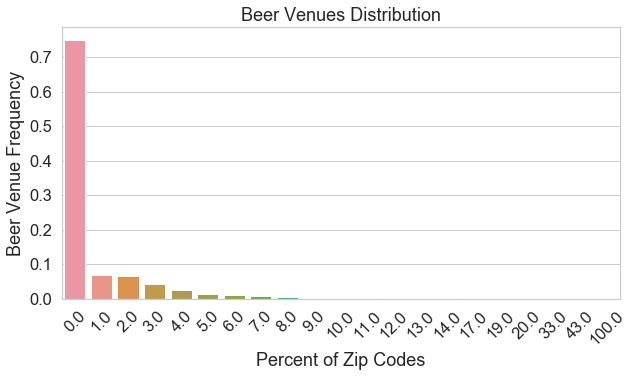

In [1006]:
sns.set_context('notebook',font_scale=1.5)
plt.figure(figsize=(10,5))

sns.barplot(x='index', 
            y='Beer Venue_freq', 
            data=data)

plt.title('Beer Venues Distribution')
plt.xlabel('Percent of Zip Codes')
plt.ylabel('Beer Venue Frequency')
plt.xticks(rotation=45)
plt.show()



In [1007]:
# Number of zipcodes with more than 1 beer venue
data = data = (features['Beer Venue_freq']*100).round(0)
len(data[data>0.0])

887

# Feature Engineering 

In [734]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Cluster Zips

## K Means

### Optimal Amount of Clusters

In [1153]:
k_cluster_list = np.arange(1,20)
k_cluster_score = []

for k in k_cluster_list:

    # set number of clusters
    kclusters = k

    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(features_scaled)
    k_cluster_score = k_cluster_score + [kmeans.inertia_]

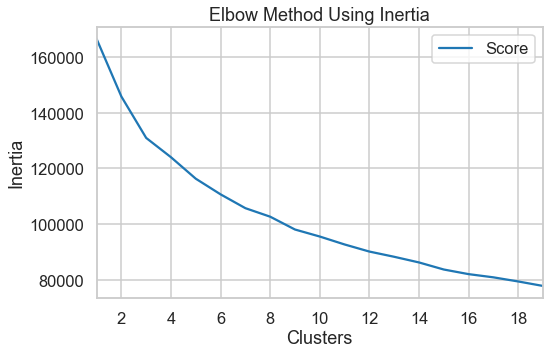

In [1156]:
# Plot "Elbow Analysis"    
ax = pd.DataFrame(k_cluster_score,k_cluster_list,columns=['Score']).plot(figsize=(8,5))
plt.ylabel('Inertia')
plt.xlabel('Clusters')
plt.title('Elbow Method Using Inertia')
plt.show()

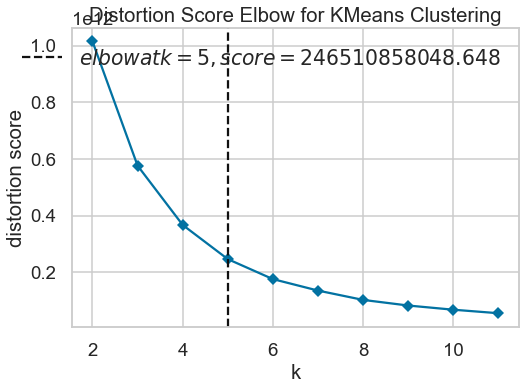

In [1199]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2,12),timings=False)
visualizer.fit(features)
visualizer.show()
plt.show()

We can see the curve change inclination at 3 clusters, so we choose 3 as the number of clusters for the analysis.    
K = 5 could potentially be used but would be detrimental to interpretability.

In [1165]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(features_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50] 

array([3, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 3, 4, 3, 2, 3, 0, 2, 0, 4, 2, 3, 2, 3, 3, 1,
       3, 3, 3, 2, 3, 2], dtype=int32)

### Add cluster labels to Zip attributes

In [1166]:
# ZIP DATA
labels_df = pd.DataFrame(features.index,columns=['zip_code'])
labels_df['cluster'] = kmeans.labels_
labels_dict = labels_df.set_index('zip_code').to_dict()['cluster']

zip_attributes['cluster'] = [labels_dict.get(key) for key in zip_attributes.index]
zip_attributes = zip_attributes.dropna()

# Convert cluster labes to int
zip_attributes['cluster'] = zip_attributes['cluster'].astype(int)
zip_attributes.head()

zip_latitude  zip_longitude      City     State  cluster
zip_code                                                          
10012        40.725960      -73.99834  New York  New York        3
10039        40.826181      -73.93710  New York  New York        1
10040        40.858704      -73.92853  New York  New York        3
10017        40.752159      -73.97231  New York  New York        3
10162        40.769334      -73.94893  New York  New York        3

### Visualize Results

In [1168]:
latitude = 37.0902
longitude = -95.7129

# create map of US using latitude and longitude values
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zip_attributes['zip_latitude'], 
                                  zip_attributes['zip_longitude'], 
                                  zip_attributes['City'], 
                                  zip_attributes['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [1186]:
# Let's view the total number of zips per cluster
cluster_counts = zip_attributes.join(features).groupby('cluster')['zip_latitude'].count().rename('Total Zips').to_frame()
cluster_counts

Total Zips
cluster            
0              1623
1               589
2               799
3               404
4               129

In [1187]:
cluster_counts.to_clipboard()

# Analyze Clusters 

## Cluster Means Table

In [1189]:
# Check mean of variables per cluster
wide_data = zip_attributes.join(features)
all_data = wide_data.groupby('cluster').mean().round(3).transpose()
all_data = all_data
#qgrid.show_grid(all_data)

print('Cluster Means')
all_data.iloc[2:].round(3)

Cluster Means


cluster                                                     0          1  \
Estimate!!INCOME AND BENEFITS (IN 2018 INFLATIO...  70871.018  33866.555   
Estimate!!COMMUTING TO WORK!!Workers 16 years a...     23.913     24.339   
Percent Estimate!!EMPLOYMENT STATUS!!Civilian l...      5.230     12.729   
Estimate!!GROSS RENT!!Occupied units paying ren...   1118.072    807.910   
Percent Estimate!!SEX AND AGE!!Total population...     49.114     48.430   
Estimate!!SEX AND AGE!!Total population!!Median...     39.298     35.619   
Percent Estimate!!SEX AND AGE!!Total population...      6.135      7.004   
Percent Estimate!!SEX AND AGE!!Total population...      6.162      6.598   
Percent Estimate!!SEX AND AGE!!Total population...      6.226      6.188   
Percent Estimate!!SEX AND AGE!!Total population...      5.875      6.551   
Percent Estimate!!SEX AND AGE!!Total population...      6.281      8.174   
Percent Estimate!!SEX AND AGE!!Total population...     14.335     15.940   
Percent Estimate!!SEX AND AGE!!Total population...     13.109     11.863   
Percent Estimate!!SEX AND AGE!!Total population...     13.668     12.615   
Percent Estimate!!SEX AND AGE!!Total population...      6.913      6.828   
Percent Estimate!!SEX AND AGE!!Total population...      6.370      5.873   
Percent Estimate!!SEX AND AGE!!Total population...      8.923      7.445   
Percent Estimate!!SEX AND AGE!!Total population...      4.487      4.044   
Percent Estimate!!SEX AND AGE!!Total population...      2.108      2.083   
Percent Estimate!!RACE!!Total population!!One r...      6.346      2.023   
Percent Estimate!!RACE!!Total population!!One r...      8.696     56.115   
Percent Estimate!!RACE!!Total population!!One r...     77.925     34.903   
Percent Estimate!!HISPANIC OR LATINO AND RACE!!...     13.118     10.598   
Percent Estimate!!PLACE OF BIRTH!!Total populat...     11.957      7.885   
Percent Estimate!!MARITAL STATUS!!Males 15 year...      2.502      3.448   
Percent Estimate!!MARITAL STATUS!!Males 15 year...     33.703     51.171   
Percent Estimate!!MARITAL STATUS!!Males 15 year...      9.886     12.929   
Percent Estimate!!MARITAL STATUS!!Males 15 year...     52.943     29.556   
Percent Estimate!!MARITAL STATUS!!Males 15 year...      1.380      3.384   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...      8.420     10.325   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...      1.837      4.134   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...     49.290     25.939   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...     27.611     45.439   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...     13.151     15.208   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...     15.420      7.378   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...     39.764     19.653   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...      8.785      7.165   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...      8.423     10.486   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...     80.589     70.439   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...      2.430      9.639   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...      1.872      4.235   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...      5.366      3.415   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...      4.782     12.836   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...      2.994      5.971   
Beer Venue_per1000                                      0.105      0.148   
Beer Venue_freq                                         0.007      0.011   
pop_estab_ratio                                        88.044     64.221   

cluster                                                     2          3  \
Estimate!!INCOME AND BENEFITS (IN 2018 INFLATIO...  46194.991  76899.364   
Estimate!!COMMUTING TO WORK!!Workers 16 years a...     26.499     24.680   
Percent Estimate!!EMPLOYMENT STATUS!!Civilian l...      8.474      5.307   
Estimate!!GROSS RENT!!Occupied units paying ren

## Comparing Age Groups Detail

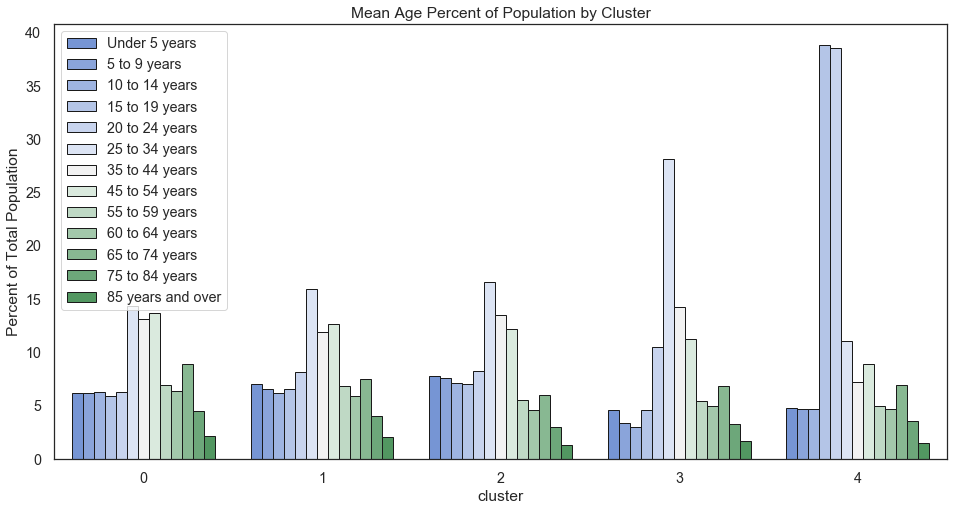

In [1271]:
sns.set_context('notebook',font_scale=1.3)
sns.set_style("white")

age_data = all_data[all_data.index.str.contains('SEX')][2:]
age_data = age_data.reset_index().melt(id_vars='index', value_name='Percent of Total Population')
age_data['Age Groups'] = age_data['index'].str.rsplit('!!',1,True)[1]

plt.figure(figsize=(16,8))
sns.barplot(x='cluster', 
            y='Percent of Total Population', 
            hue='Age Groups',
            orient='v',
            palette=sns.diverging_palette(255, 133, l=60, n=13, center="light"),
            edgecolor=".1",
            data=age_data)

plt.title('Mean Age Percent of Population by Cluster')
plt.legend(frameon=True,loc='upper left')
plt.show()

From the above plot, we conclude that cluster 1 population is generally younger than others, with 15 - 24 year olds representing on average more than 70% of the cluster population. 

## Income by Cluster

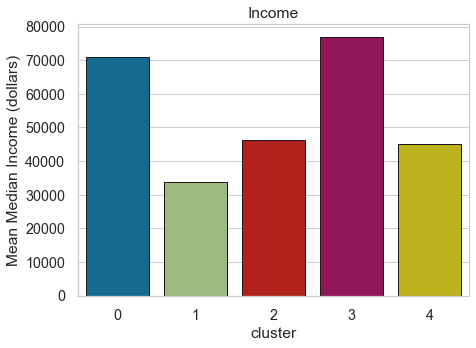

In [1171]:
income_data = all_data[all_data.index.str.contains('INCOME')]
income_data = income_data.reset_index().melt(id_vars='index', value_name='Mean Median Income (dollars)')
#income_data['M'] = income_data['index'].str.rsplit('!!',1,True)[1]
income_data

sns.set_context('notebook',font_scale=1.3)
plt.figure(figsize=(7,5))
sns.barplot(x='cluster', 
            y='Mean Median Income (dollars)',
            orient='v',
            edgecolor=".1",
            data=income_data)

plt.title('Income')
plt.show()

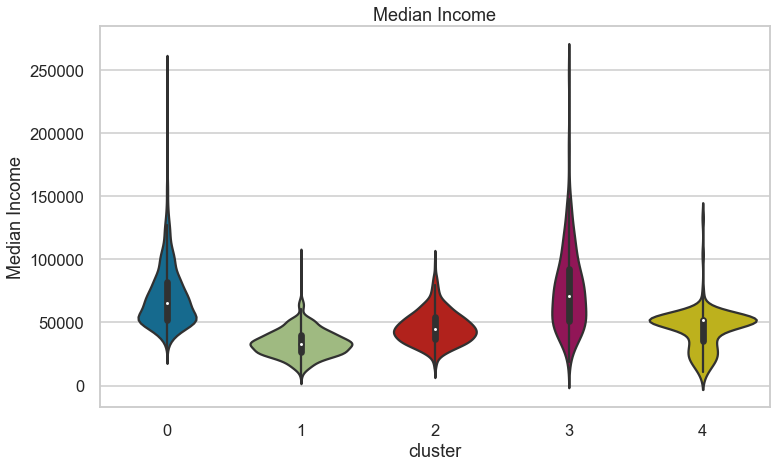

In [1172]:
attribute_name= 'Median Income'

income_data_2 = wide_data[list(wide_data.columns[wide_data.columns.str.contains('INCOME')]) + ['cluster']] 
income_data_2.columns = [attribute_name, 'cluster']

# Plot
sns.set_context('talk',font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))

sns.violinplot(y=attribute_name, x='cluster',data=income_data_2)

plt.title(attribute_name)
plt.show()

Cluster 1 is made up lower incomes, cluster 2 can be defined as middle income. While cluster 3 and 0 are high income. Cluster 4 has a peculiar distribution consisting of mainly middle income level, with some lower income neighborhoods. 

## Race

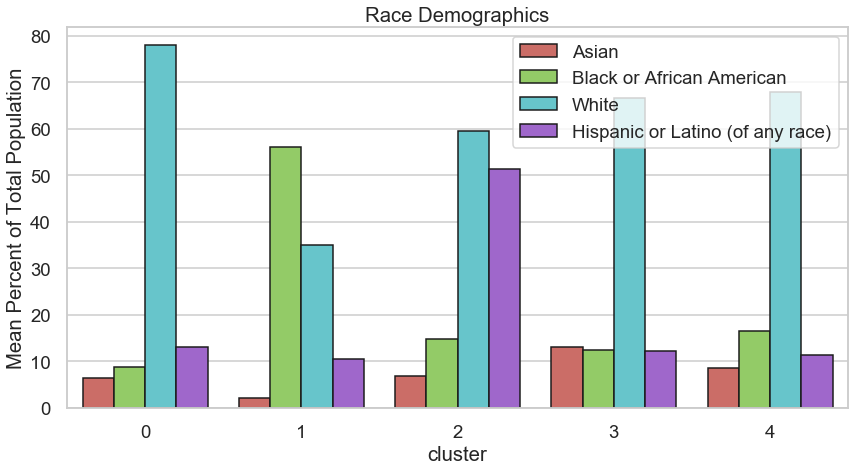

In [1215]:
race_data = all_data[all_data.index.str.contains('RACE')]
race_data = race_data.reset_index().melt(id_vars='index', value_name='Mean Percent of Total Population')
race_data['Race'] = race_data['index'].str.rsplit('!!',1,True)[1]

# Plot
sns.set_context('talk',font_scale=1.13)
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.barplot(x='cluster', 
            y='Mean Percent of Total Population', 
            hue='Race',
            orient='v',
            palette=sns.color_palette("hls", 4),
            edgecolor=".1",
            data=race_data)

plt.title('Race Demographics')
plt.legend(loc='upper right',frameon=True)
plt.show()

## Marital Status

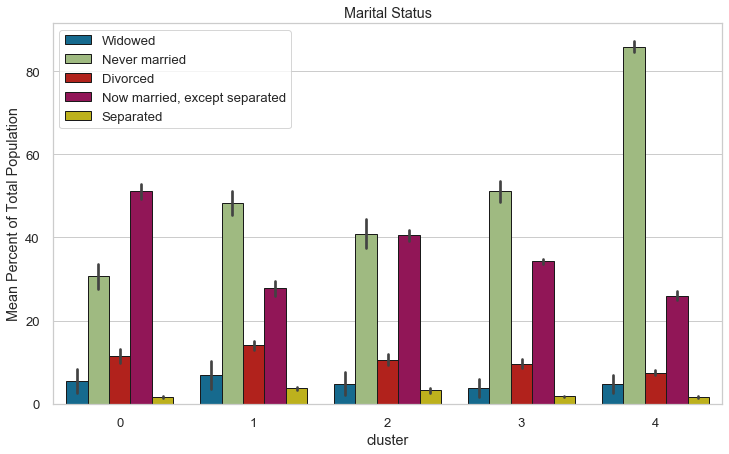

In [1217]:
marital_data = all_data[all_data.index.str.contains('MARITAL')]
marital_data = marital_data.reset_index().melt(id_vars='index', value_name='Mean Percent of Total Population')
marital_data['Marital Status'] = marital_data['index'].str.rsplit('!!',1,True)[1]

# Plot
sns.set_context('notebook',font_scale=1.2)
plt.figure(figsize=(12,7))
sns.barplot(x='cluster', 
            y='Mean Percent of Total Population', 
            hue='Marital Status',
            orient='v',
           # palette=sns.diverging_palette(255, 133, l=60, n=13, center="light"),
            edgecolor=".1",
            data=marital_data)

plt.title('Marital Status')
plt.legend(loc='upper left',frameon=True)
plt.show()

## Educational Attainmnent 

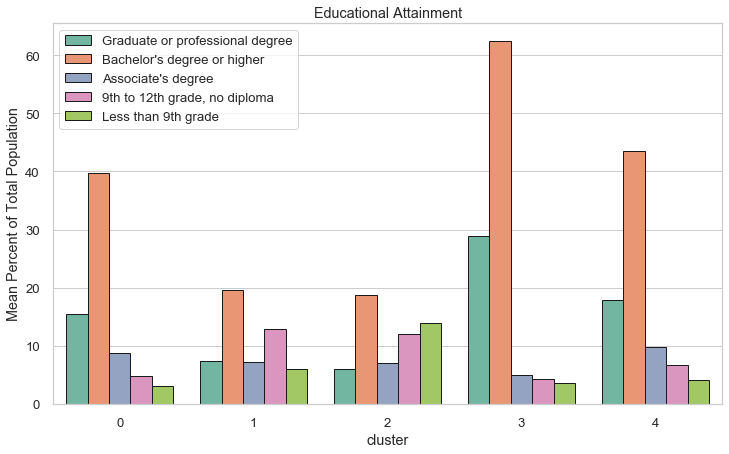

In [1218]:
attribute_name= 'Educational Attainment'

educational_data = all_data[all_data.index.str.contains('EDUCATIONAL')]
educational_data = educational_data.reset_index().melt(id_vars='index', value_name='Mean Percent of Total Population')
educational_data[attribute_name] = educational_data['index'].str.rsplit('!!',1,True)[1]

# Plot
sns.set_context('notebook',font_scale=1.2)
plt.figure(figsize=(12,7))
sns.barplot(x='cluster', 
            y='Mean Percent of Total Population', 
            hue=attribute_name,
            orient='v',
           palette=sns.color_palette("Set2"),
            edgecolor=".1",
            data=educational_data)

plt.title(attribute_name)
plt.legend(loc='upper left',frameon=True)
plt.show()

## Commuting to work

In [1299]:
all_data[all_data.index.str.contains('COMMUT')][1:]

cluster                                                  0       1       2  \
Percent Estimate!!COMMUTING TO WORK!!Workers 16...   8.423  10.486  13.143   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...  80.589  70.439  73.214   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...   2.430   9.639   5.764   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...   1.872   4.235   2.553   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...   5.366   3.415   3.252   

cluster                                                  3       4  
Percent Estimate!!COMMUTING TO WORK!!Workers 16...   5.721   6.947  
Percent Estimate!!COMMUTING TO WORK!!Workers 16...  49.956  38.733  
Percent Estimate!!COMMUTING TO WORK!!Workers 16...  18.481   6.761  
Percent Estimate!!COMMUTING TO WORK!!Workers 16...  14.602  36.837  
Percent Estimate!!COMMUTING TO WORK!!Workers 16...   7.208  10.570

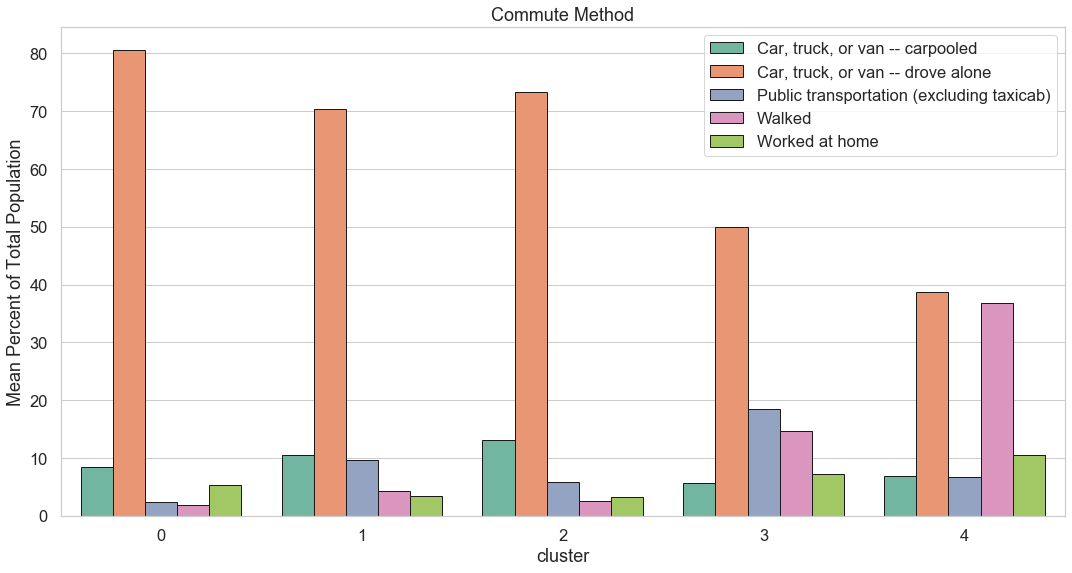

In [1294]:
attribute_name= 'Commute Method'

commuting_data = all_data[all_data.index.str.contains('COMMUT')][1:]
commuting_data = commuting_data.reset_index().melt(id_vars='index', value_name='Mean Percent of Total Population')
commuting_data[attribute_name] = commuting_data['index'].str.rsplit('!!',1,True)[1]

# Plot
sns.set_context('notebook',font_scale=1.5)
plt.figure(figsize=(18,9))
sns.barplot(x='cluster', 
            y='Mean Percent of Total Population', 
            hue=attribute_name,
            orient='v',
           palette=sns.color_palette("Set2"),
            edgecolor=".1",
            data=commuting_data)

plt.title(attribute_name)
plt.legend(frameon=True)
plt.show()

In [1314]:
commute_time = all_data[all_data.index.str.contains('COMMUT')][:1]
commute_time.index = ['Mean Travel Time to Work (min)']
commute_time.round().transpose()

Mean Travel Time to Work (min)
cluster                                
0                                  24.0
1                                  24.0
2                                  26.0
3                                  25.0
4                                  15.0

## Rent

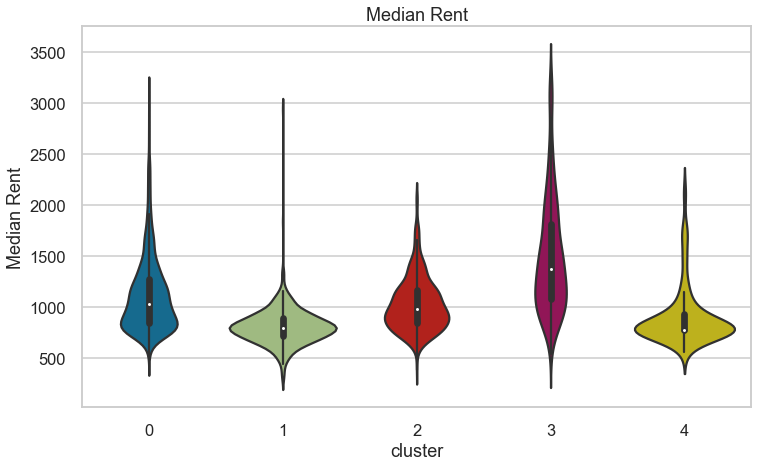

In [1220]:
attribute_name= 'Median Rent'

rent_data = wide_data[list(wide_data.columns[wide_data.columns.str.contains('RENT')]) + ['cluster']] 
rent_data.columns = ['Median Rent', 'cluster']

# Plot
sns.set_context('talk',font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))

sns.violinplot(y='Median Rent', x='cluster',data=rent_data)

plt.title(attribute_name)
plt.show()

Outliers skewing the data for this metric!

## Employment Status

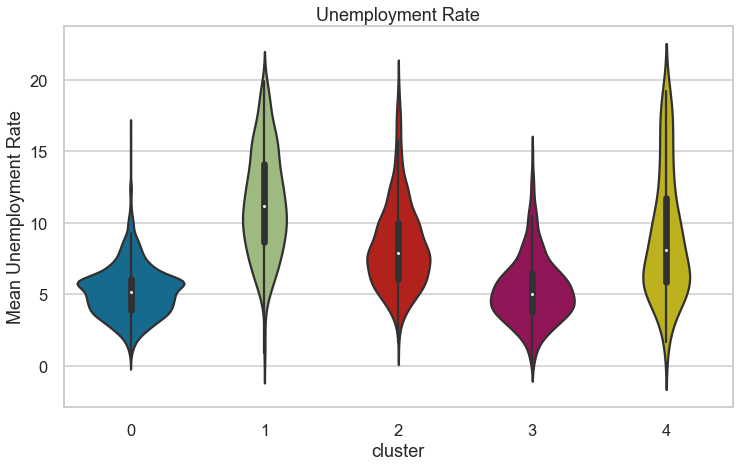

In [1178]:
attribute_name= 'Unemployment Rate'

unemp_data = wide_data[list(wide_data.columns[wide_data.columns.str.contains('EMPLOYMENT')]) + ['cluster']] 
unemp_data.columns = ['Mean Unemployment Rate', 'cluster']

# We'll filter out outliers to better grasp distribution
unemp_data = unemp_data[unemp_data['Mean Unemployment Rate']<20]

# Plot
sns.set_context('talk',font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))

sns.violinplot(y='Mean Unemployment Rate', x='cluster',data=unemp_data)

plt.title(attribute_name)
plt.show()

## Business Establishments per 1000 people

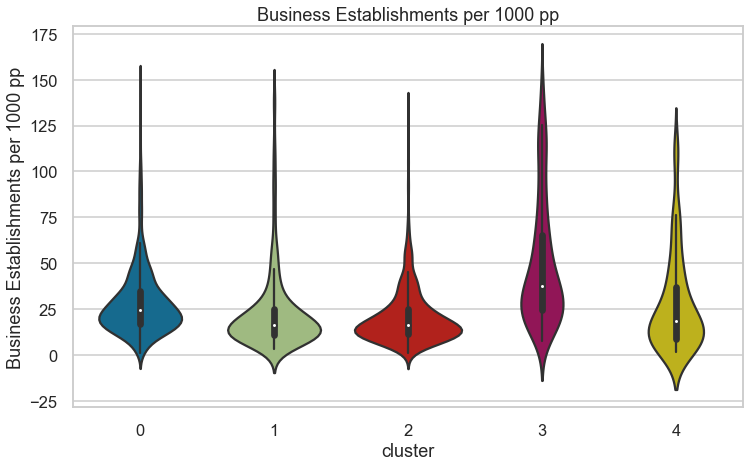

In [1275]:
attribute_name= 'Business Establishments per 1000 pp'

est_data = wide_data[list(wide_data.columns[wide_data.columns.str.contains('pop_estab_ratio')]) + ['cluster']] 
est_data.columns = ['Business Establishments per 1000 pp', 'cluster']

est_data = est_data[est_data['Business Establishments per 1000 pp']<150]

# Plot
sns.set_context('talk',font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))

sns.violinplot(y='Business Establishments per 1000 pp', x='cluster',data=est_data)

plt.title(attribute_name)
plt.show()

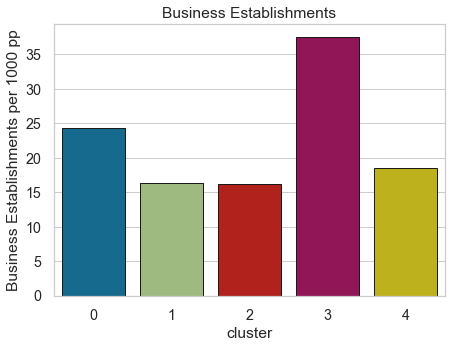

In [1287]:
data_mean_estab = est_data.groupby('cluster').median().reset_index()

sns.set_context('notebook',font_scale=1.3)
plt.figure(figsize=(7,5))
sns.barplot(x='cluster', 
            y=data_mean_estab.columns[1],
            orient='v',
            edgecolor=".1",
            data=data_mean_estab)

plt.title('Business Establishments')
plt.show()

## Beer Venues

### Beer Venue per 1000 People

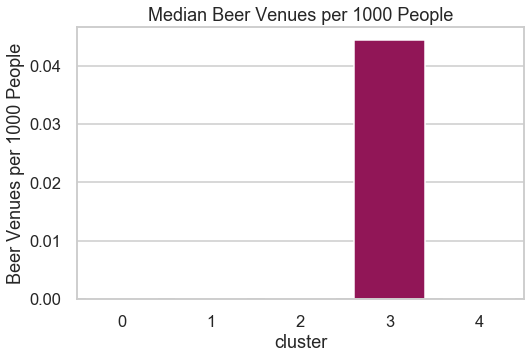

In [1238]:
attribute_name= 'Median Beer Venues per 1000 People'

beer1000_data = wide_data[list(wide_data.columns[wide_data.columns.str.contains('Venue_per1000')]) + ['cluster']] 
beer1000_data.columns = ['Beer Venues per 1000 People', 'cluster']

# Plot
sns.set_context('talk',font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))

sns.barplot(x='cluster',y='Beer Venues per 1000 People',data = beer1000_data.groupby('cluster').median().reset_index())

plt.title(attribute_name)
plt.show()

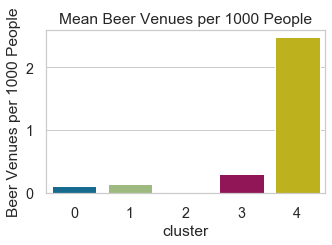

In [1269]:
attribute_name= 'Mean Beer Venues per 1000 People'

beer1000_data = wide_data[list(wide_data.columns[wide_data.columns.str.contains('Venue_per1000')]) + ['cluster']] 
beer1000_data.columns = ['Beer Venues per 1000 People', 'cluster']

# Plot
sns.set_context('notebook',font_scale=1.3)
sns.set_style('whitegrid')
plt.figure(figsize=(5,3))

sns.barplot(x='cluster',y='Beer Venues per 1000 People',data = beer1000_data.groupby('cluster').mean().reset_index())

plt.title(attribute_name)
plt.show()

Looking at the venue specific features, cluster 4 and 3 have higher numbers of venues per 1000 people. It’s worth noting, however, grouping by mean can be deceiving. When the median is also analyzed, only cluster 3 has noticeably higher rate of beer venues than others.

### Filtered for outliers

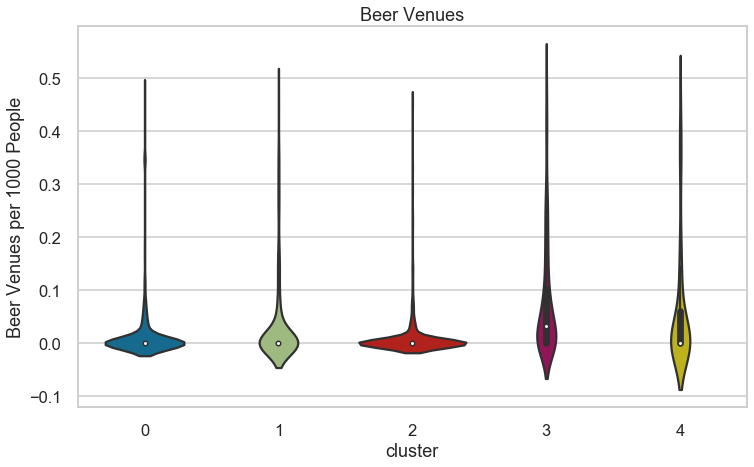

In [1181]:
attribute_name= 'Beer Venues'

beer1000_data = wide_data[list(wide_data.columns[wide_data.columns.str.contains('Venue_per1000')]) + ['cluster']] 
beer1000_data.columns = ['Beer Venues per 1000 People', 'cluster']
beer1000_filter = beer1000_data[beer1000_data['Beer Venues per 1000 People']<0.5]

# Plot
sns.set_context('talk',font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))

sns.violinplot(y='Beer Venues per 1000 People', x='cluster',data=beer1000_filter)

plt.title(attribute_name)
plt.show()

A violin plot, with high outliers (values > 0.5) filtered out shows that clusters 3 and 4 indeed have a higher number of beer venues per 1000 people at lower rates (less than 0.1).  
Below, we look at the number of zipcodes with more than 0.5 beer venues per 1000 people:

In [1182]:
# Number of zip codes with more than 45 beer venues per 1000 people
len(beer1000_data[beer1000_data['Beer Venues per 1000 People']>=0.5])

118

Greater than 1:

In [1240]:
# All other
len(beer1000_data[beer1000_data['Beer Venues per 1000 People']>1])

72

### Beer Venue Percent of Total Venues

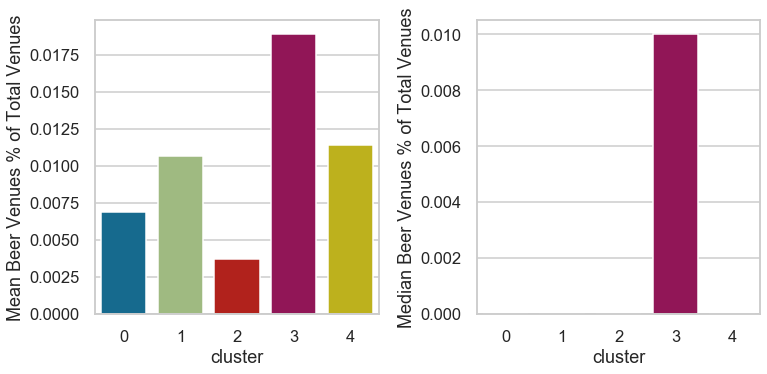

In [1270]:
attribute_name= 'Beer Venue Frequency'

beer_freq_data = wide_data[list(wide_data.columns[wide_data.columns.str.contains('Venue_freq')]) + ['cluster']] 



sns.set_context('talk')
sns.set_style('whitegrid')

# Plot
f, axes = plt.subplots(1, 2, figsize=(11, 5.5), sharex=True)
beer_freq_data.columns = ['Mean Beer Venues % of Total Venues', 'cluster']

sns.barplot(x='cluster',
                  y='Mean Beer Venues % of Total Venues',
                  data = beer_freq_data.groupby('cluster').mean().reset_index(),
                  ax=axes[0])

#plt.title(attribute_name)

beer_freq_data.columns = ['Median Beer Venues % of Total Venues', 'cluster']
sns.barplot(x='cluster',
                  y='Median Beer Venues % of Total Venues',
                  data = beer_freq_data.groupby('cluster').median().reset_index(),
                  ax=axes[1])

#plt.title(attribute_name)
plt.tight_layout()
plt.show()

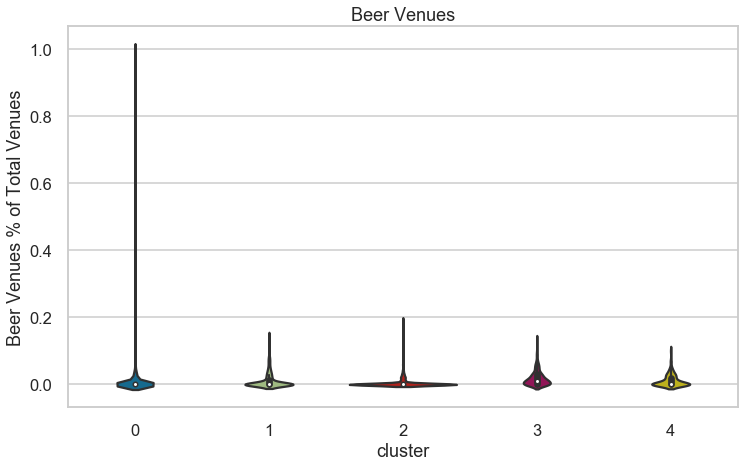

In [1184]:
attribute_name= 'Beer Venues'

beer_freq_data = wide_data[list(wide_data.columns[wide_data.columns.str.contains('Venue_freq')]) + ['cluster']] 
beer_freq_data.columns = ['Beer Venues % of Total Venues', 'cluster']

# Plot
sns.set_context('talk',font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))

sns.violinplot(y='Beer Venues % of Total Venues', x='cluster',data=beer_freq_data)

plt.title(attribute_name)
plt.show()

## Cluster Median Table

In [1319]:
cluster_medians = wide_data.groupby('cluster').median().round(4).transpose()[2:]
cluster_medians

cluster                                                    0         1  \
Estimate!!INCOME AND BENEFITS (IN 2018 INFLATIO...  65197.00  33110.00   
Estimate!!COMMUTING TO WORK!!Workers 16 years a...     23.70     23.00   
Percent Estimate!!EMPLOYMENT STATUS!!Civilian l...      5.20     11.60   
Estimate!!GROSS RENT!!Occupied units paying ren...   1026.00    799.00   
Percent Estimate!!SEX AND AGE!!Total population...     48.90     47.40   
Estimate!!SEX AND AGE!!Total population!!Median...     38.90     34.90   
Percent Estimate!!SEX AND AGE!!Total population...      5.90      7.00   
Percent Estimate!!SEX AND AGE!!Total population...      6.10      6.50   
Percent Estimate!!SEX AND AGE!!Total population...      6.20      6.30   
Percent Estimate!!SEX AND AGE!!Total population...      5.90      6.30   
Percent Estimate!!SEX AND AGE!!Total population...      5.80      7.60   
Percent Estimate!!SEX AND AGE!!Total population...     14.00     15.20   
Percent Estimate!!SEX AND AGE!!Total population...     12.70     11.90   
Percent Estimate!!SEX AND AGE!!Total population...     13.70     12.50   
Percent Estimate!!SEX AND AGE!!Total population...      6.90      6.50   
Percent Estimate!!SEX AND AGE!!Total population...      6.30      5.70   
Percent Estimate!!SEX AND AGE!!Total population...      8.60      7.30   
Percent Estimate!!SEX AND AGE!!Total population...      4.40      3.70   
Percent Estimate!!SEX AND AGE!!Total population...      1.90      1.60   
Percent Estimate!!RACE!!Total population!!One r...      3.70      1.30   
Percent Estimate!!RACE!!Total population!!One r...      5.40     56.50   
Percent Estimate!!RACE!!Total population!!One r...     81.00     33.60   
Percent Estimate!!HISPANIC OR LATINO AND RACE!!...      8.50      5.60   
Percent Estimate!!PLACE OF BIRTH!!Total populat...      9.00      5.60   
Percent Estimate!!MARITAL STATUS!!Males 15 year...      2.40      3.00   
Percent Estimate!!MARITAL STATUS!!Males 15 year...     32.90     50.80   
Percent Estimate!!MARITAL STATUS!!Males 15 year...      9.80     12.20   
Percent Estimate!!MARITAL STATUS!!Males 15 year...     53.60     29.30   
Percent Estimate!!MARITAL STATUS!!Males 15 year...      1.30      3.10   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...      8.40      9.60   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...      1.80      3.90   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...     49.10     25.80   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...     27.00     45.00   
Percent Estimate!!MARITAL STATUS!!Females 15 ye...     12.70     14.70   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...     13.30      6.10   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...     37.70     18.10   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...      8.60      7.00   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...      8.50     10.10   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...     81.20     74.00   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...      1.30      6.00   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...      1.40      2.30   
Percent Estimate!!COMMUTING TO WORK!!Workers 16...      4.70      3.10   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...      4.50     12.20   
Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popul...      2.60      4.90   
Beer Venue_per1000                                      0.00      0.00   
Beer Venue_freq                                         0.00      0.00   
pop_estab_ratio                                        24.67     17.17   

cluster                                                    2           3  \
Estimate!!INCOME AND BENEFITS (IN 2018 INFLATIO...  44867.00  71048.0000   
Estimate!!COMMUTING TO WORK!!Workers 16 years a...     26.50     23.8500   
Percent Estimate!!EMPLOYMENT STATUS!!Civilian l...      7.90      5.0000   
Estimate!!GROSS RENT!!Occupied units paying ren...    979.00   1376.0000   
Percent Estimate!!SEX AND AGE!!Total population...     49.70     50

# Potential Neighborhoods to Open New Venue

In this section, the goal is to define which neghborhoods in cluster three have potential to open new beer venues. Potential neighborhoods are defined by being the ones with beer frequencies and population scores lower than median values for the cluster. It's assumed this neighborhoods are not yet saturated in their markets.

## Filters

In [1364]:
# Median Beer Venues per 1000 people for cluster 3
cluster_3_bv1000 = cluster_medians.loc['Beer Venue_per1000'].loc[3] 

# Median Beer Venue Freq for cluster 3
cluster_3_bfreq = cluster_medians.loc['Beer Venue_freq'].loc[3] 

# Cluster data
cluster_data = zip_attributes.join(features)

# We filter the neighborhood data to our criteria
best_neighborhoods =  cluster_data[cluster_data['cluster']==3]
best_neighborhoods = best_neighborhoods[best_neighborhoods['Beer Venue_per1000']<cluster_3_bv1000]
best_neighborhoods = best_neighborhoods[best_neighborhoods['Beer Venue_freq']<cluster_3_bfreq]

**How many neighborhoods are suggested?**

In [1365]:

print(len(best_neighborhoods), ' potential neighborhoods to open new beer venues')

133  potential neighborhoods to open new beer venues


## Map

In [1340]:
latitude = 37.0902
longitude = -95.7129

# create map of US using latitude and longitude values
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=3)


# add markers to the map
for lat, lon, poi in zip(best_neighborhoods['zip_latitude'], 
                                  best_neighborhoods['zip_longitude'], 
                                  best_neighborhoods['City']):
    label = folium.Popup(str(poi) + ' Cluster ', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters